      Coefficient value
D3            -0.018082
TILT          -0.038031
OBS           -5.546286
HR             2.578451
FQ            -0.007839
       Actual   Predicted
167      -104  -95.000153
5058     -103  -90.982994
15123     -90  -89.523984
10897     -89  -86.607152
4550     -100 -106.385917
...       ...         ...
10186     -80  -88.551485
2919     -114 -104.170788
17512     -69  -79.280727
954       -97  -99.366317
8717      -90  -95.601185

[5415 rows x 2 columns]
Mean absolute error: 7.21
Mean squared error: 80.75
Root mean squared error: 8.99
R²: 0.3644856136701392
Training time: 0.009727716445922852s


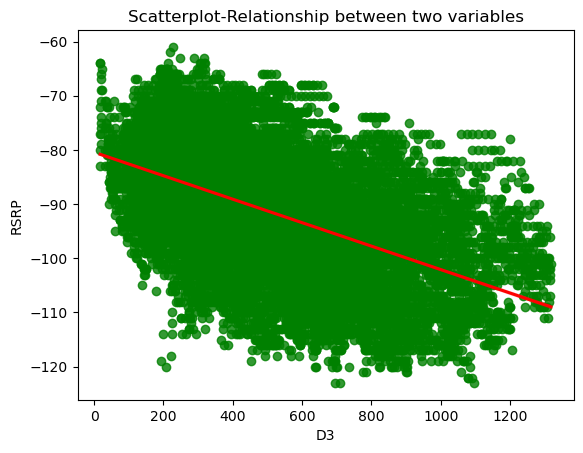

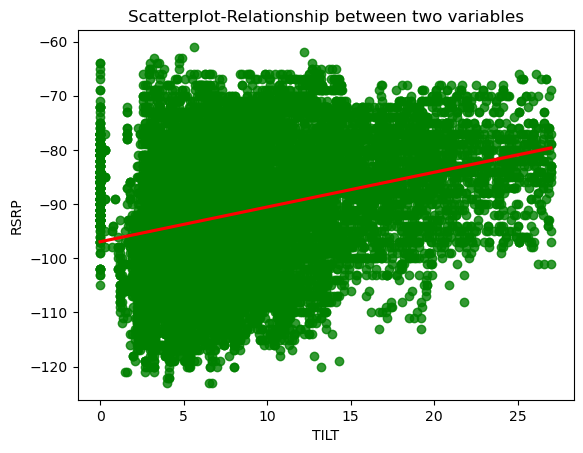

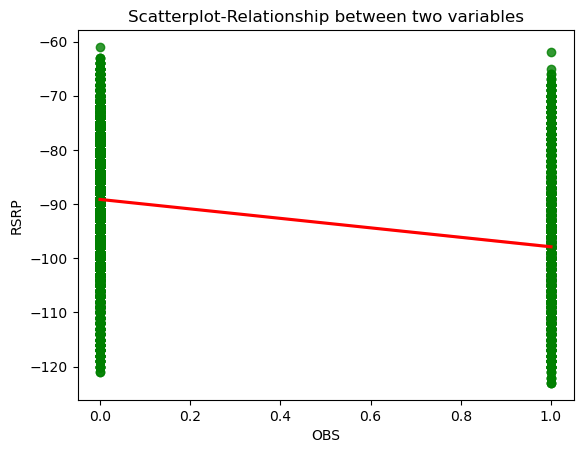

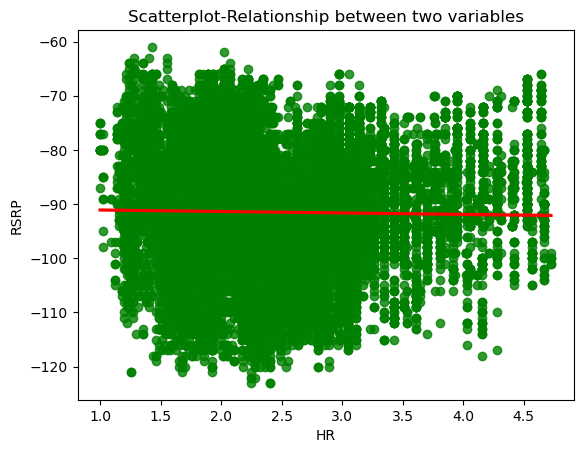

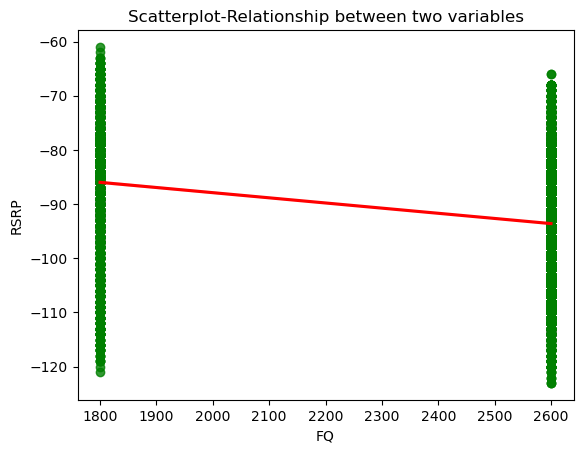

In [4]:
#Simple Linear Regression model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import time

df = pd.read_csv('Dataset.csv')

variables = ['D3','TILT','OBS','HR','FQ']
for var in variables:
    plt.figure()
    sns.regplot(x=var, y='RSRP', data=df, scatter_kws={"color": "green"},
                line_kws={"color": "red"}).set(title=
                                               'Scatterplot-Relationship between two variables');
start = time.time()      
SEED = 30
Y = df['RSRP']
X = df[['D3','TILT','OBS','HR','FQ']]
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.3, 
                                                    random_state=SEED)
X.shape
regressor = LinearRegression()
regressor.fit(X_train, y_train)
regressor.score(X_test, y_test)
regressor.score(X_train, y_train)
regressor.intercept_
regressor.coef_
feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients, 
                              index = feature_names, 
                              columns = ['Coefficient value'])
print(coefficients_df)
 
y_pred = regressor.predict(X_test)
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(results)
stop = time.time()

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)
print(f"Training time: {stop - start}s")
